# WeatherPy

---

    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind  = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount gambier
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | nova sintra
Processing Record 8 of Set 1 | jabat
Processing Record 9 of Set 1 | fenghuang
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | lambarene
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | bel ombre
Processing Record 21 of Set 1 | la ronge
Processing Record 22 of

Processing Record 41 of Set 4 | pontianak
Processing Record 42 of Set 4 | iskateley
Processing Record 43 of Set 4 | sabang
Processing Record 44 of Set 4 | yerofey pavlovich
Processing Record 45 of Set 4 | el matama
Processing Record 46 of Set 4 | yambio
Processing Record 47 of Set 4 | abraham's bay
City not found. Skipping...
Processing Record 48 of Set 4 | tadmur
Processing Record 49 of Set 4 | kapa'a
Processing Record 0 of Set 5 | thunder bay
Processing Record 1 of Set 5 | the bottom
Processing Record 2 of Set 5 | kudepsta
Processing Record 3 of Set 5 | ji'an
Processing Record 4 of Set 5 | la passe
Processing Record 5 of Set 5 | timbuktu
Processing Record 6 of Set 5 | barras
Processing Record 7 of Set 5 | leava
Processing Record 8 of Set 5 | vilyuchinsk
Processing Record 9 of Set 5 | novohrad-volynskyi
Processing Record 10 of Set 5 | papatowai
Processing Record 11 of Set 5 | maues
Processing Record 12 of Set 5 | puerto baquerizo moreno
Processing Record 13 of Set 5 | koyulhisar
Proce

Processing Record 35 of Set 8 | tamanrasset
Processing Record 36 of Set 8 | fuglafjordur
Processing Record 37 of Set 8 | pagar alam
Processing Record 38 of Set 8 | bowen
Processing Record 39 of Set 8 | lewiston orchards
Processing Record 40 of Set 8 | buala
Processing Record 41 of Set 8 | sogne
Processing Record 42 of Set 8 | constantia
Processing Record 43 of Set 8 | necochea
Processing Record 44 of Set 8 | pangody
Processing Record 45 of Set 8 | siaya
Processing Record 46 of Set 8 | alofi
Processing Record 47 of Set 8 | san andros
City not found. Skipping...
Processing Record 48 of Set 8 | xianning
Processing Record 49 of Set 8 | fortuna
Processing Record 0 of Set 9 | zahedan
Processing Record 1 of Set 9 | huanuni
Processing Record 2 of Set 9 | klasterec nad ohri
Processing Record 3 of Set 9 | niafunke
Processing Record 4 of Set 9 | saint-philippe
Processing Record 5 of Set 9 | sogndal
Processing Record 6 of Set 9 | gizo
Processing Record 7 of Set 9 | cable beach
City not found. Skip

Processing Record 25 of Set 12 | yabelo
Processing Record 26 of Set 12 | makarov
Processing Record 27 of Set 12 | marovoay
Processing Record 28 of Set 12 | bakchar
Processing Record 29 of Set 12 | makinsk
Processing Record 30 of Set 12 | samdrup jongkhar
Processing Record 31 of Set 12 | santo angelo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount gambier,-37.8333,140.7667,12.04,95,100,3.11,AU,1692519361
1,bethel,41.3712,-73.4140,16.06,84,0,0.00,US,1692519362
2,port-aux-francais,-49.3500,70.2167,1.88,74,100,11.98,TF,1692519362
3,thompson,55.7435,-97.8558,9.09,93,20,3.09,CA,1692519363
4,adamstown,-25.0660,-130.1015,17.49,58,10,10.99,PN,1692519363


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount gambier,-37.8333,140.7667,12.04,95,100,3.11,AU,1692519361
1,bethel,41.3712,-73.4140,16.06,84,0,0.00,US,1692519362
2,port-aux-francais,-49.3500,70.2167,1.88,74,100,11.98,TF,1692519362
3,thompson,55.7435,-97.8558,9.09,93,20,3.09,CA,1692519363
4,adamstown,-25.0660,-130.1015,17.49,58,10,10.99,PN,1692519363


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

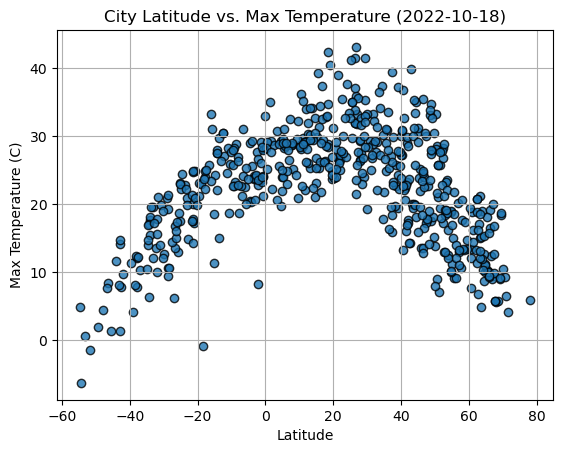

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

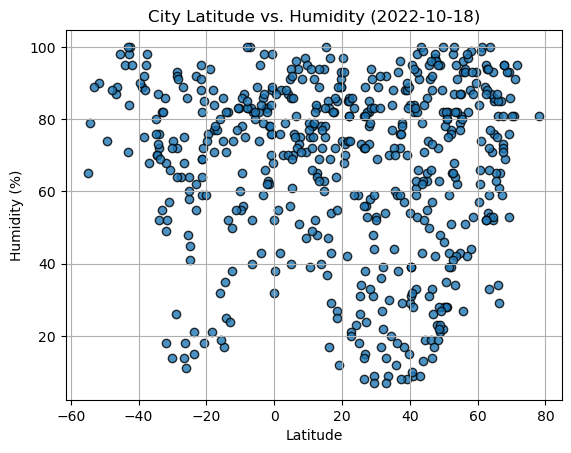

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

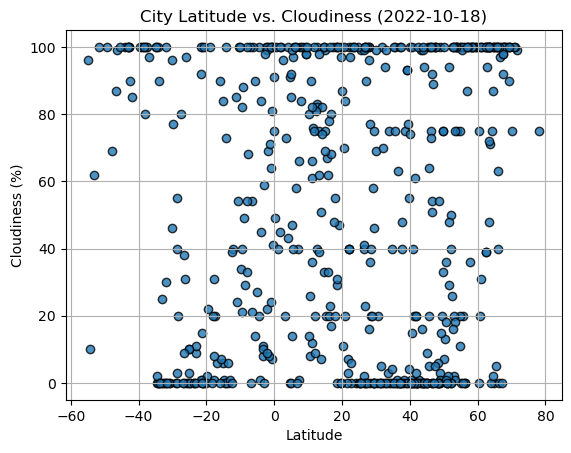

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

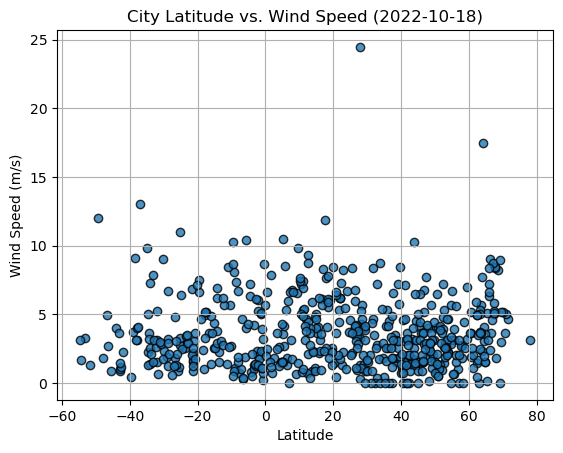

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

SyntaxError: incomplete input (278605567.py, line 2)

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

IndentationError: unexpected indent (2935082405.py, line 2)

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE